In [1]:
pip install numpy pandas matplotlib seaborn scikit-learn xgboost tensorflow


ERROR: Could not install packages due to an OSError: [Errno 2] No such file or directory: 'C:\\Users\\MAHAJAN\\AppData\\Local\\Packages\\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\\LocalCache\\local-packages\\Python311\\site-packages\\tensorflow\\include\\external\\com_github_grpc_grpc\\src\\core\\ext\\filters\\client_channel\\lb_policy\\grpclb\\client_load_reporting_filter.h'
HINT: This error might have occurred since this system does not have Windows Long Path support enabled. You can find information on how to enable this at https://pip.pypa.io/warnings/enable-long-paths




  Using cached xgboost-3.0.0-py3-none-win_amd64.whl.metadata (2.1 kB)
  Using cached tensorflow-2.19.0-cp311-cp311-win_amd64.whl.metadata (4.1 kB)
Using cached xgboost-3.0.0-py3-none-win_amd64.whl (150.0 MB)
Using cached tensorflow-2.19.0-cp311-cp311-win_amd64.whl (375.9 MB)

   ---------------------------------------- 0/2 [xgboost]
   ---------------------------------------- 0/2 [xgboost]
   ---------------------------------------- 0/2 [xgboost]
   ---------------------------------------- 0/2 [xgboost]
   ---------------------------------------- 0/2 [xgboost]
   ---------------------------------------- 0/2 [xgboost]
   ---------------------------------------- 0/2 [xgboost]
   ---------------------------------------- 0/2 [xgboost]
   ---------------------------------------- 0/2 [xgboost]
   ---------------------------------------- 0/2 [xgboost]
   ---------------------------------------- 0/2 [xgboost]
   ---------------------------------------- 0/2 [xgboost]
   -----------------------

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.preprocessing import PolynomialFeatures

In [4]:
import pandas as pd

# Load the training data
train_series = pd.read_csv('./converted_train_series.csv')
train_events = pd.read_csv('./train_events.csv')

# Load the test data
test_series = pd.read_csv('./converted_test_series.csv')


C:\Users\MAHAJAN\AppData\Local\Temp\ipykernel_56924\2874265381.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_data['event'].fillna('none', inplace=True)


Missing values in features:
anglez            0
enmo              0
angle_diff        1
anglez_squared    0
log_enmo          0
dtype: int64


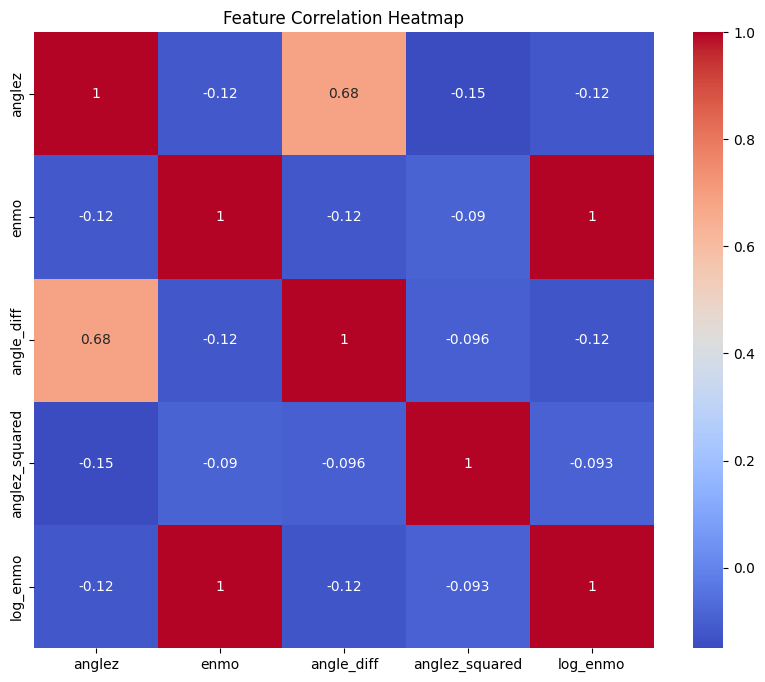

C:\Users\MAHAJAN\AppData\Local\Temp\ipykernel_56924\2874265381.py:34: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(train_data[feature], shade=True, color='blue')


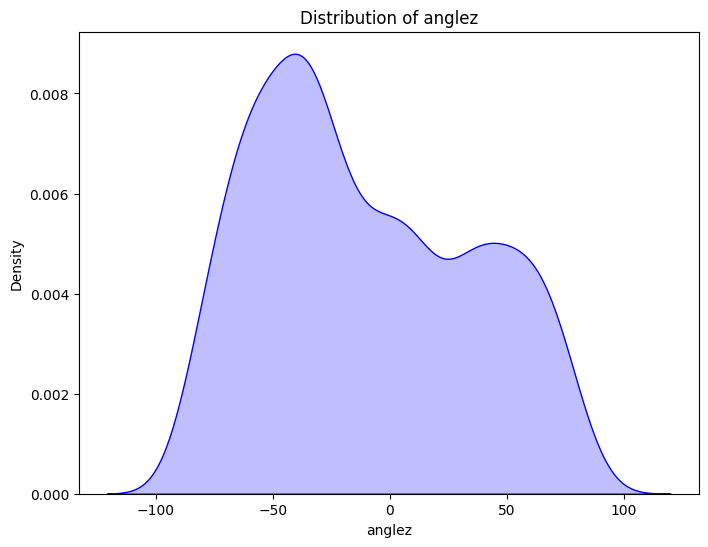

C:\Users\MAHAJAN\AppData\Local\Temp\ipykernel_56924\2874265381.py:34: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(train_data[feature], shade=True, color='blue')


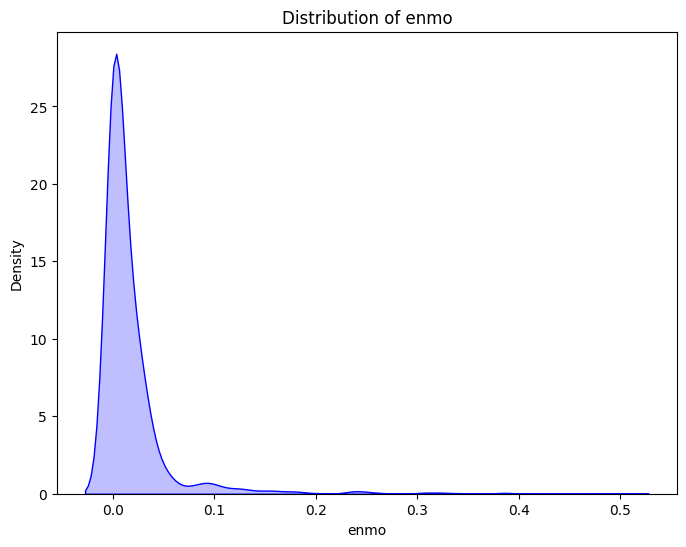

C:\Users\MAHAJAN\AppData\Local\Temp\ipykernel_56924\2874265381.py:34: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(train_data[feature], shade=True, color='blue')


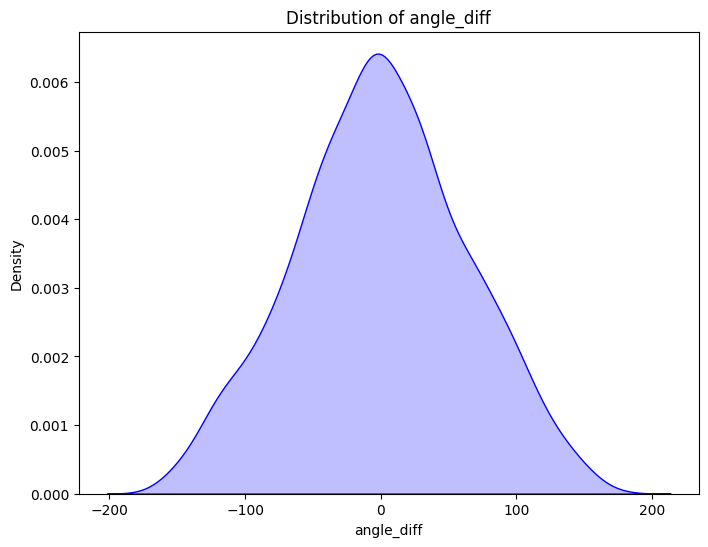

C:\Users\MAHAJAN\AppData\Local\Temp\ipykernel_56924\2874265381.py:34: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(train_data[feature], shade=True, color='blue')


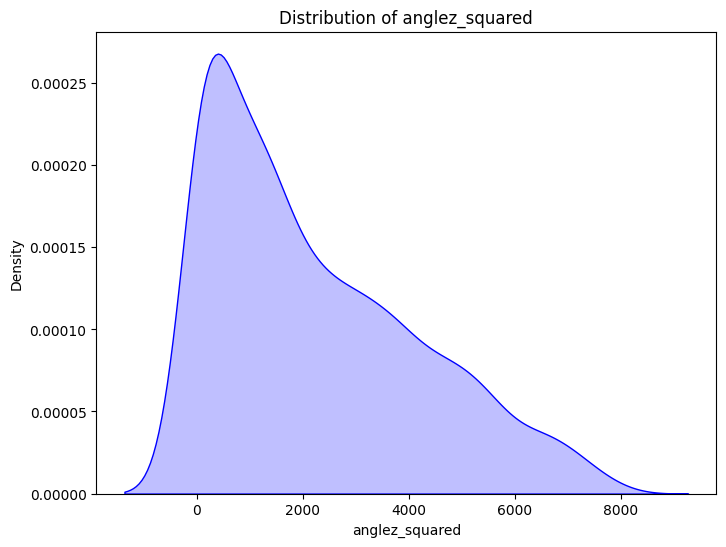

C:\Users\MAHAJAN\AppData\Local\Temp\ipykernel_56924\2874265381.py:34: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(train_data[feature], shade=True, color='blue')


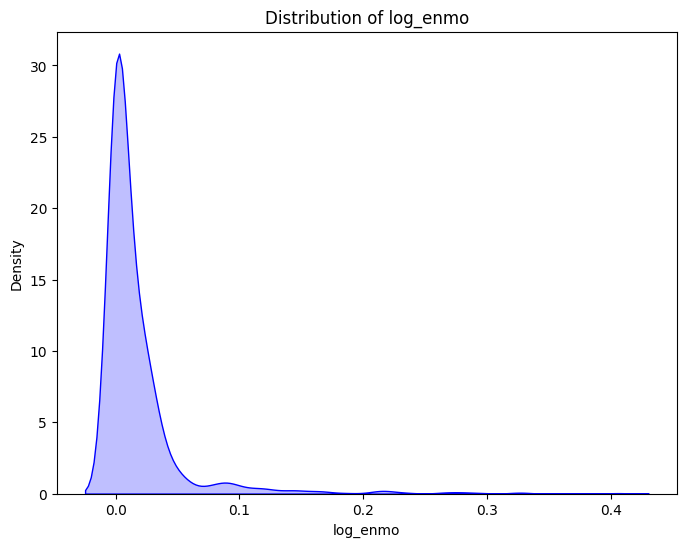

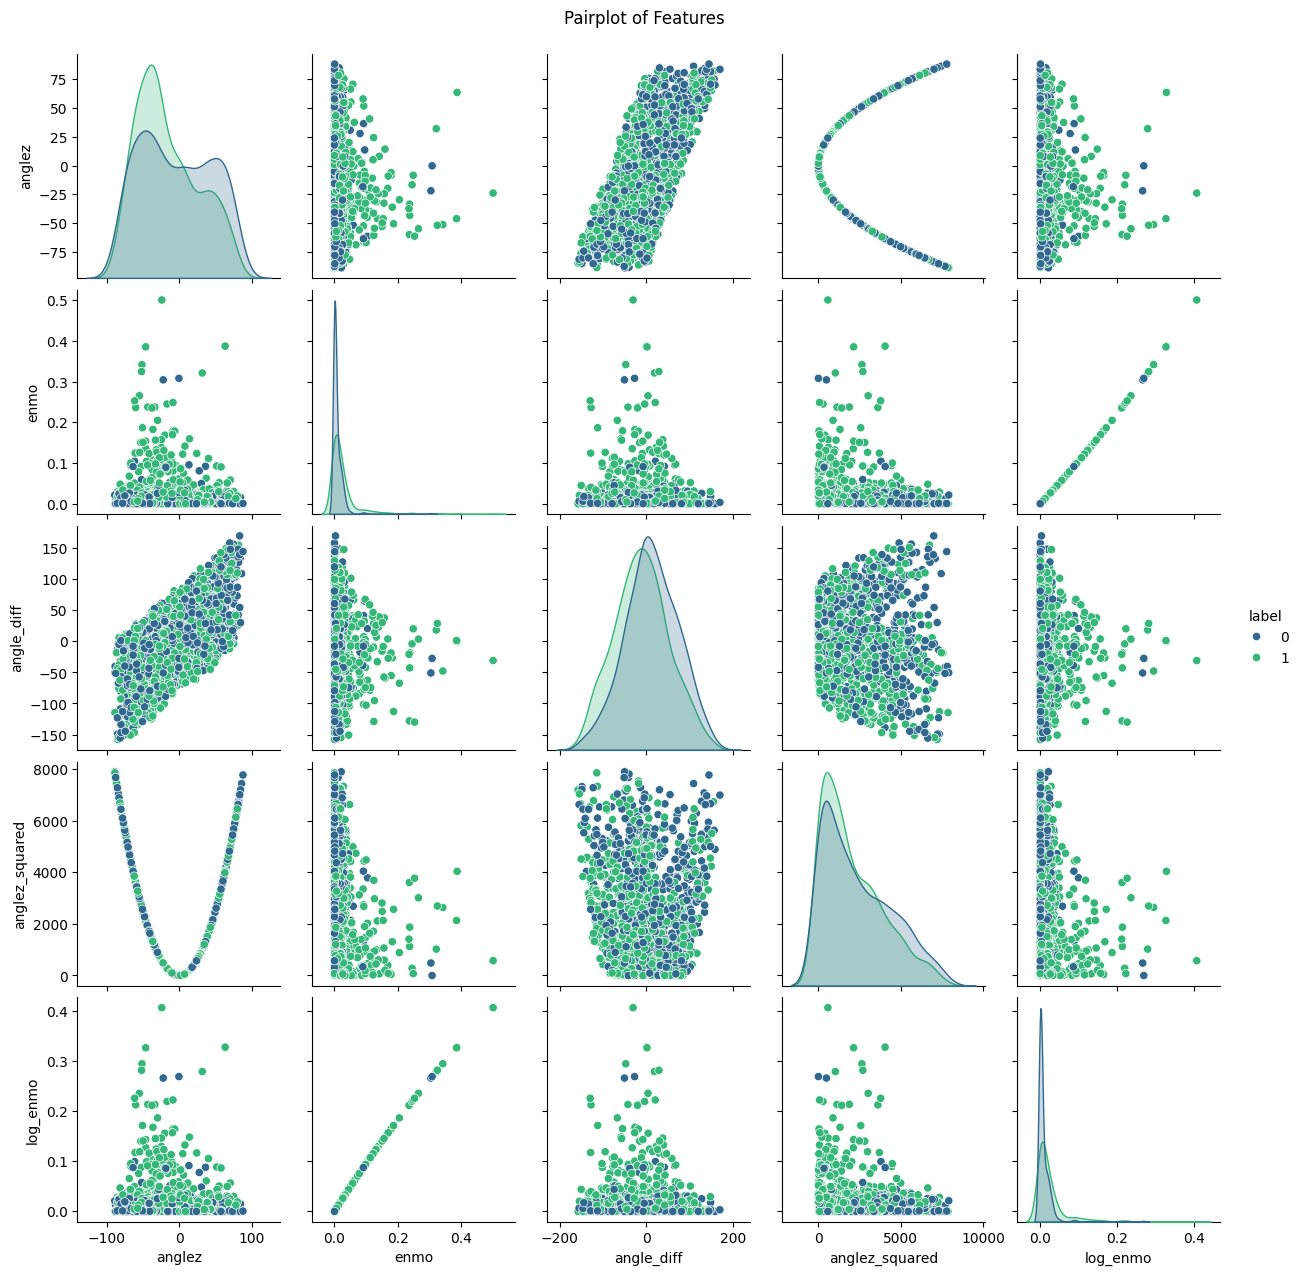


=== Step 1: Imputation ===

=== Step 2: Scaling ===

=== Step 3: Power Transformation ===

=== Step 4: Polynomial Feature Expansion ===

=== Step 5: Feature Selection ===
Selected features after feature selection:
['anglez' 'enmo' 'angle_diff' 'log_enmo' 'anglez enmo' 'anglez log_enmo'
 'enmo angle_diff' 'enmo log_enmo' 'angle_diff anglez_squared'
 'angle_diff log_enmo']

=== Step 6: Splitting Data ===

=== Step 7: Checking NaN or Inf values ===
Any NaN in X_train: False
Any Inf in X_train: False
Any NaN in X_val: False
Any Inf in X_val: False

Correlation matrix of features:
          0         1         2         3         4         5         6  \
0  1.000000 -0.239928  0.678741 -0.241066 -0.149848 -0.148888 -0.101256   
1 -0.239928  1.000000 -0.186738  0.999956 -0.104561 -0.103259 -0.114249   
2  0.678741 -0.186738  1.000000 -0.187175 -0.105621 -0.104934 -0.102637   
3 -0.241066  0.999956 -0.187175  1.000000 -0.103468 -0.102188 -0.113113   
4 -0.149848 -0.104561 -0.105621 -0.103468

In [5]:

# Merge train_series and train_events
train_data = pd.merge(train_series, train_events, on=['series_id', 'step'], how='left')
train_data['event'].fillna('none', inplace=True)
train_data['label'] = train_data['event'].apply(lambda x: 1 if x == 'onset' else (0 if x == 'wakeup' else -1))
train_data = train_data[train_data['label'] != -1]

# Feature Engineering
train_data['angle_diff'] = train_data['anglez'].diff()
train_data['anglez_squared'] = train_data['anglez'] ** 2
train_data['log_enmo'] = np.log1p(train_data['enmo'])

# Feature Selection
features = ['anglez', 'enmo', 'angle_diff', 'anglez_squared', 'log_enmo']
X = train_data[features]
y = train_data['label']

# === VISUALIZATION BEFORE PREPROCESSING ===
import seaborn as sns
import matplotlib.pyplot as plt

# Missing values
print("Missing values in features:")
print(X.isnull().sum())

# Correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(X.corr(), annot=True, cmap='coolwarm')
plt.title("Feature Correlation Heatmap")
plt.show()

# Feature distributions
for feature in features:
    plt.figure(figsize=(8, 6))
    sns.kdeplot(train_data[feature], shade=True, color='blue')
    plt.title(f"Distribution of {feature}")
    plt.show()

# Pairplot
sns.pairplot(train_data[features + ['label']], hue='label', palette='viridis')
plt.suptitle("Pairplot of Features", y=1.02)
plt.show()

# === PREPROCESSING ===
from sklearn.impute import KNNImputer
from sklearn.preprocessing import StandardScaler, RobustScaler, PolynomialFeatures, PowerTransformer
from sklearn.feature_selection import SelectKBest, mutual_info_classif
from sklearn.model_selection import train_test_split

# Imputation
print("\n=== Step 1: Imputation ===")
imputer = KNNImputer(n_neighbors=5)
X_imputed = imputer.fit_transform(X)

# Feature Scaling
print("\n=== Step 2: Scaling ===")
scaler = StandardScaler()  # You can experiment with other scalers like MinMaxScaler
X_scaled = scaler.fit_transform(X_imputed)

# Power Transformation
print("\n=== Step 3: Power Transformation ===")
transformer = PowerTransformer(method='yeo-johnson')
X_transformed = transformer.fit_transform(X_scaled)

# Polynomial Feature Expansion
print("\n=== Step 4: Polynomial Feature Expansion ===")
poly = PolynomialFeatures(degree=2, interaction_only=True, include_bias=False)
X_poly = poly.fit_transform(X_transformed)

# Feature Selection using Mutual Information
print("\n=== Step 5: Feature Selection ===")
selector = SelectKBest(score_func=mutual_info_classif, k=10)
X_selected = selector.fit_transform(X_poly, y)

# Selected feature names
feature_names = poly.get_feature_names_out(features)
selected_features = feature_names[selector.get_support()]
print("Selected features after feature selection:")
print(selected_features)

# === DATA SPLIT ===
print("\n=== Step 6: Splitting Data ===")
X_train, X_val, y_train, y_val = train_test_split(X_selected, y, test_size=0.2, random_state=42)

# Check if any feature has NaN or Inf values after transformation
import numpy as np
print("\n=== Step 7: Checking NaN or Inf values ===")
print("Any NaN in X_train:", np.any(np.isnan(X_train)))
print("Any Inf in X_train:", np.any(np.isinf(X_train)))
print("Any NaN in X_val:", np.any(np.isnan(X_val)))
print("Any Inf in X_val:", np.any(np.isinf(X_val)))

# === Further Processing ===
# Optional: Check for multicollinearity if you want to drop highly correlated features
import pandas as pd
corr_matrix = pd.DataFrame(X_train).corr()
print("\nCorrelation matrix of features:")
print(corr_matrix)

In [6]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.impute import KNNImputer
from sklearn.preprocessing import StandardScaler, PolynomialFeatures, PowerTransformer
from sklearn.feature_selection import SelectKBest, mutual_info_classif
from sklearn.model_selection import train_test_split, StratifiedKFold, RandomizedSearchCV, cross_val_score
from sklearn.metrics import make_scorer, f1_score, accuracy_score
from sklearn.utils.class_weight import compute_class_weight  # <-- ADD THIS

from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier


In [7]:
# === SETUP ===
import warnings
warnings.filterwarnings('ignore')

import numpy as np
from sklearn.utils.class_weight import compute_class_weight
from sklearn.model_selection import RandomizedSearchCV, StratifiedKFold, cross_val_score
from sklearn.metrics import f1_score, accuracy_score, make_scorer
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

# === CLASS WEIGHTS ===
print("\n=== Step 8: Computing Class Weights ===")
class_weights = compute_class_weight('balanced', classes=np.unique(y_train), y=y_train)
class_weight_dict = {0: class_weights[0], 1: class_weights[1]}
print(f"Class weights: {class_weight_dict}")

# === COMBINED SCORING FUNCTION ===
def combined_scorer(y_true, y_pred):
    f1 = f1_score(y_true, y_pred, average='macro')
    acc = accuracy_score(y_true, y_pred)
    return 0.7 * f1 + 0.3 * acc

# === DEFINE MODELS ===
def define_models(class_weight_dict):
    return {
        'XGBoost': (XGBClassifier(random_state=42, eval_metric='logloss', tree_method='gpu_hist'), {
            'n_estimators': [100, 200, 300, 400],
            'max_depth': [3, 5, 7, 9, 11],
            'learning_rate': [0.001, 0.01, 0.05, 0.1, 0.2],
            'subsample': [0.6, 0.7, 0.8, 0.9, 1.0],
            'colsample_bytree': [0.6, 0.7, 0.8, 0.9, 1.0],
            'gamma': [0, 0.1, 0.2, 0.3, 0.4],
            'min_child_weight': [1, 3, 5],
            'scale_pos_weight': [class_weight_dict[1]/class_weight_dict[0]]
        }),
        'SVM': (SVC(probability=True, random_state=42), {
            'C': np.logspace(-2, 2, 8),  # Reduced
            'kernel': ['rbf', 'poly'],
            'gamma': ['scale', 'auto'],
            'class_weight': [class_weight_dict, 'balanced']
        }),
        'Logistic Regression': (LogisticRegression(random_state=42, max_iter=2000), {
            'C': np.logspace(-2, 2, 8),  # Reduced
            'penalty': ['l1', 'l2'],
            'solver': ['saga'],
            'l1_ratio': [0, 0.5, 1]  # Simplified elasticnet control
        }),
        'Random Forest': (RandomForestClassifier(random_state=42), {
            'n_estimators': [100, 200],
            'max_depth': [None, 10, 20],
            'min_samples_split': [2, 5],
            'min_samples_leaf': [1, 2],
            'max_features': ['sqrt', 'log2'],
            'bootstrap': [True],
            'class_weight': ['balanced', 'balanced_subsample', class_weight_dict]
        }),
    }

# === TRAIN MODELS ===
def train_models(models, X_train, y_train, cv_splits=5, scoring=make_scorer(combined_scorer)):
    cv = StratifiedKFold(n_splits=cv_splits, shuffle=True, random_state=42)
    best_models = {}

    for model_name, (model, param_grid) in models.items():
        print(f"\n=== Training {model_name} with {cv_splits}-fold CV ===")
        
        search = RandomizedSearchCV(
            model, param_grid,
            n_iter=10,  # Reduced from 50 to 10
            cv=cv,
            scoring=scoring,
            n_jobs=-1,
            random_state=42,
            verbose=2
        )
        
        search.fit(X_train, y_train)
        best_models[model_name] = search.best_estimator_
        
        # 5-fold CV evaluation
        cv_scores = cross_val_score(
            search.best_estimator_,
            X_train, y_train,
            cv=cv,
            scoring=scoring,
            n_jobs=-1
        )
        
        print(f"Best {model_name} params: {search.best_params_}")
        print(f"5-fold CV Score: {np.mean(cv_scores):.4f} ± {np.std(cv_scores):.4f}")
        
        if hasattr(search.best_estimator_, 'feature_importances_'):
            importances = search.best_estimator_.feature_importances_
            print(f"Top 5 features: {sorted(zip(selected_features, importances), key=lambda x: x[1], reverse=True)[:5]}")
    
    return best_models

# === RUN ===
models = define_models(class_weight_dict)
best_models = train_models(models, X_train, y_train, cv_splits=5)



=== Step 8: Computing Class Weights ===
Class weights: {0: 0.9926229508196721, 1: 1.0074875207986689}

=== Training XGBoost with 5-fold CV ===
Fitting 5 folds for each of 10 candidates, totalling 50 fits
Best XGBoost params: {'subsample': 0.6, 'scale_pos_weight': 1.0149750415973378, 'n_estimators': 200, 'min_child_weight': 3, 'max_depth': 11, 'learning_rate': 0.001, 'gamma': 0.4, 'colsample_bytree': 0.6}
5-fold CV Score: 0.6373 ± 0.0309
Top 5 features: [('log_enmo', 0.20614633), ('enmo', 0.19340147), ('enmo log_enmo', 0.10932233), ('angle_diff', 0.09694943), ('anglez', 0.07341047)]

=== Training SVM with 5-fold CV ===
Fitting 5 folds for each of 10 candidates, totalling 50 fits
Best SVM params: {'kernel': 'rbf', 'gamma': 'scale', 'class_weight': 'balanced', 'C': 26.826957952797247}
5-fold CV Score: 0.6299 ± 0.0216

=== Training Logistic Regression with 5-fold CV ===
Fitting 5 folds for each of 10 candidates, totalling 50 fits
Best Logistic Regression params: {'solver': 'saga', 'penalt


=== Model Evaluation Results ===
XGBoost: F1 Score = 0.7563, Accuracy = 0.7581
SVM: F1 Score = 0.6751, Accuracy = 0.6796
Logistic Regression: F1 Score = 0.6327, Accuracy = 0.6350
Random Forest: F1 Score = 0.8846, Accuracy = 0.8852

=== Best Model: Random Forest ===


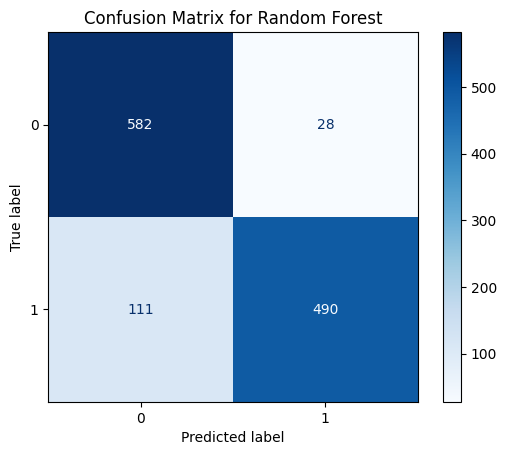


Best model saved as: random_forest_best_model.pkl


In [8]:
from sklearn.metrics import f1_score, accuracy_score, confusion_matrix, ConfusionMatrixDisplay
import joblib  # for saving the model
import matplotlib.pyplot as plt

# === EVALUATE BEST MODELS ===
def evaluate_and_save_models(best_models, X_train, y_train):
    scores = {}
    
    print("\n=== Model Evaluation Results ===")
    for model_name, model in best_models.items():
        y_pred = model.predict(X_train)
        f1 = f1_score(y_train, y_pred, average='macro')
        acc = accuracy_score(y_train, y_pred)
        scores[model_name] = (f1, acc)
        
        print(f"{model_name}: F1 Score = {f1:.4f}, Accuracy = {acc:.4f}")
    
    # Find best model by F1 Score (you can change to Accuracy if you want)
    best_model_name = max(scores, key=lambda k: scores[k][0])
    best_model = best_models[best_model_name]
    
    print(f"\n=== Best Model: {best_model_name} ===")
    
    # Confusion Matrix
    y_pred_best = best_model.predict(X_train)
    cm = confusion_matrix(y_train, y_pred_best)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot(cmap=plt.cm.Blues)
    plt.title(f'Confusion Matrix for {best_model_name}')
    plt.show()
    
    # Save the best model
    model_filename = f"{best_model_name.replace(' ', '_').lower()}_best_model.pkl"
    joblib.dump(best_model, model_filename)
    print(f"\nBest model saved as: {model_filename}")

# === RUN EVALUATION ===
evaluate_and_save_models(best_models, X_train, y_train)


In [21]:
import pandas as pd
import numpy as np
import joblib

# === PREPARE TEST DATA ===

test_data = test_series.copy()

test_data['angle_diff'] = test_data['anglez'].diff()
test_data['anglez_squared'] = test_data['anglez'] ** 2
test_data['log_enmo'] = np.log1p(test_data['enmo'])

X_test_features = test_data[features]
X_test_imputed = imputer.transform(X_test_features)
X_test_scaled = scaler.transform(X_test_imputed)
X_test_poly = poly.transform(X_test_scaled)
X_test_selected = selector.transform(X_test_poly)

# === GIVE THE BEST MODEL NAME MANUALLY ===

best_model_name = 'Random Forest'  # <-- Write your best model name here that came earlier

# === LOAD THE BEST MODEL ===

best_model = joblib.load(f"{best_model_name.replace(' ', '_').lower()}_best_model.pkl")

# === PREDICT ON TEST DATA ===

test_predictions = best_model.predict(X_test_selected)

# === CREATE SUBMISSION FILE ===

submission = pd.DataFrame({
    'row_id': range(len(test_series)),
    'series_id': test_series['series_id'],
    'step': test_series['step'],
    'event': ['onset' if pred == 1 else 'wakeup' if pred == 0 else 'none' for pred in test_predictions],
    'score': [max(prob) for prob in best_model.predict_proba(X_test_selected)] if hasattr(best_model, 'predict_proba') else [0.5] * len(test_series)
})

submission_filename = "submission_kriti_final.csv"
submission.to_csv(submission_filename, index=False)

print(f"Submission file created: {submission_filename}")


Submission file created: submission_kriti_final.csv



=== Confidence Score Summary ===
            mean    median       min       max       std
event                                                   
onset   0.633439  0.556765  0.500695  0.973900  0.148303
wakeup  0.539636  0.530763  0.500217  0.748169  0.035258

=== Visualizing Confidence Score Distributions ===


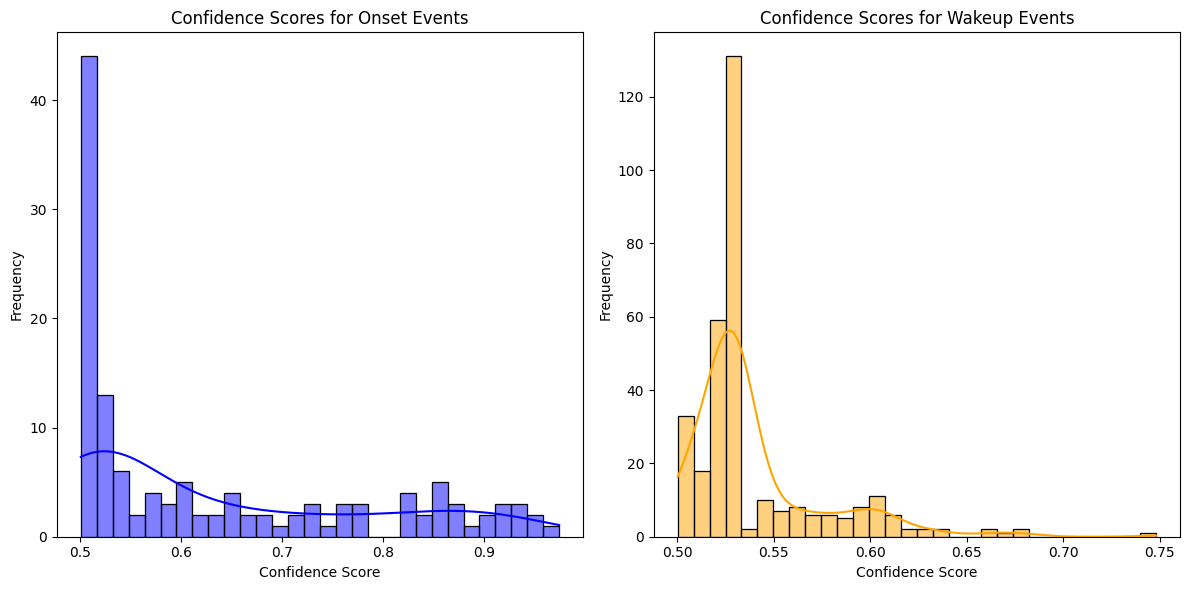

In [23]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# === Step 1: Load Submission File ===
# Assuming the submission file is already created and named 'submission_final.csv'
submission_df = pd.read_csv('submission_kriti_final.csv')

# Filter rows where the event is either 'onset' or 'wakeup'
submission_filtered = submission_df[submission_df['event'].isin(['onset', 'wakeup'])]

# === Step 2: Evaluate Confidence Scores ===
print("\n=== Confidence Score Summary ===")

# Group by event type and calculate summary statistics
confidence_summary = submission_filtered.groupby('event')['score'].agg(['mean', 'median', 'min', 'max', 'std'])
print(confidence_summary)

# === Step 3: Visualize Confidence Score Distributions ===
print("\n=== Visualizing Confidence Score Distributions ===")

plt.figure(figsize=(12, 6))

# Confidence scores for 'onset'
plt.subplot(1, 2, 1)
sns.histplot(submission_filtered[submission_filtered['event'] == 'onset']['score'], bins=30, kde=True, color='blue')
plt.title('Confidence Scores for Onset Events')
plt.xlabel('Confidence Score')
plt.ylabel('Frequency')

# Confidence scores for 'wakeup'
plt.subplot(1, 2, 2)
sns.histplot(submission_filtered[submission_filtered['event'] == 'wakeup']['score'], bins=30, kde=True, color='orange')
plt.title('Confidence Scores for Wakeup Events')
plt.xlabel('Confidence Score')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

In [25]:
pip uninstall tensorflow


Note: you may need to restart the kernel to use updated packages.


In [28]:
conda install tensorflow

ValueError: The python kernel does not appear to be a conda environment.  Please use ``%pip install`` instead.

In [27]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.model_selection import RandomizedSearchCV, StratifiedKFold
from sklearn.metrics import f1_score, accuracy_score, confusion_matrix
import joblib

# === CNN Model Builder ===
def create_cnn(optimizer='adam', dropout_rate=0.5, num_filters=32, kernel_size=3):
    model = Sequential([
        Conv2D(num_filters, (kernel_size, kernel_size), activation='relu', input_shape=X_train.shape[1:]),
        MaxPooling2D(pool_size=(2, 2)),
        BatchNormalization(),
        Flatten(),
        Dense(128, activation='relu'),
        Dropout(dropout_rate),
        Dense(1, activation='sigmoid')
    ])
    model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])
    return model

# === Wrap the model ===
cnn = KerasClassifier(build_fn=create_cnn, verbose=0)

# === Hyperparameter grid ===
param_grid = {
    'optimizer': ['adam', 'rmsprop'],
    'dropout_rate': [0.3, 0.5, 0.7],
    'num_filters': [32, 64, 128],
    'kernel_size': [3, 5],
    'batch_size': [32, 64],
    'epochs': [10, 20]
}

# === Early stopping ===
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

# === Randomized Search with CV ===
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

random_search = RandomizedSearchCV(
    estimator=cnn,
    param_distributions=param_grid,
    n_iter=10,
    cv=cv,
    verbose=2,
    n_jobs=1,  # TensorFlow models cannot parallel train easily
    random_state=42
)

# === Train ===
random_search.fit(X_train, y_train, callbacks=[early_stopping])

# === Best model ===
best_cnn = random_search.best_estimator_

# === Evaluate on train set ===
y_pred_prob = best_cnn.predict(X_train)
y_pred = (y_pred_prob > 0.5).astype(int)

f1 = f1_score(y_train, y_pred)
acc = accuracy_score(y_train, y_pred)

print(f"Best CNN F1 Score: {f1:.4f}")
print(f"Best CNN Accuracy: {acc:.4f}")
print("Confusion Matrix:")
print(confusion_matrix(y_train, y_pred))

# === Save best model ===
best_cnn.model.save('best_cnn_model.h5')
print("CNN Model Saved!")

# Optionally, save the model as .pkl file (if you need it for scikit-learn compatibility):
joblib.dump(best_cnn.model, 'best_cnn_model.pkl')
print("Model also saved as best_cnn_model.pkl")


ModuleNotFoundError: No module named 'tensorflow.python'